In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('eletronic_sales.xlsx')
print("Table Head")
df.head()


Table Head


,Date,Branch,Sales Agent,Products,Units,Price
0,2014-09-01,Woji,Chinedu,Apple,2,125.00
1,2015-06-17,Woji,Emeka,Apple,5,125.00
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29
3,2015-11-17,Woji,Tolu,HP,11,4.99
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29


In [10]:
df.shape

(43, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         43 non-null     datetime64[ns]
 1   Branch       43 non-null     object        
 2   Sales Agent  43 non-null     object        
 3   Products     43 non-null     object        
 4   Units        43 non-null     int64         
 5   Price        43 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [ ]:
print("Shape of the dataset")
print("Shape:", df.shape)
print("\n", "==" * 20)
print("Info (data types and nulls\n")
df.info()
print("\n", "==" * 20)
print("Summary statistics\n")
print(df.describe())
print("\n", "==" * 20)
print("Check for missing values\n")
df.isna().sum()

Shape of the dataset
Shape: (43, 6)

Info (data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         43 non-null     datetime64[ns]
 1   Branch       43 non-null     object        
 2   Sales Agent  43 non-null     object        
 3   Products     43 non-null     object        
 4   Units        43 non-null     int64         
 5   Price        43 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.1+ KB

Summary statistics

                      Date      Units       Price
count                   43  43.000000   43.000000
mean   2014-12-29 00:00:00  49.325581   20.308605
min    2014-01-06 00:00:00   2.000000    1.290000
25%    2014-07-03 12:00:00  27.500000    3.990000
50%    2014-12-29 00:00:00  53.000000    4.990000
75%    2015-06-25 12:00:00  74.500000  

Date           0
Branch         0
Sales Agent    0
Products       0
Units          0
Price          0
dtype: int64

In [13]:
for cols in df.columns:
    print(f"{cols}: {df[cols].nunique()} unique values out of {len(df[cols])}")

Date: 43 unique values out of 43
Branch: 3 unique values out of 43
Sales Agent: 11 unique values out of 43
Products: 5 unique values out of 43
Units: 37 unique values out of 43
Price: 12 unique values out of 43


In [14]:
df.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
dtype: object

In [15]:
for cols in df.columns:
    print(f"{cols} has {df.duplicated().sum()} dupilcates")

Date has 0 dupilcates
Branch has 0 dupilcates
Sales Agent has 0 dupilcates
Products has 0 dupilcates
Units has 0 dupilcates
Price has 0 dupilcates


In [16]:
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.month_name()
#df = df.drop(columns=['Month_Name'])

In [17]:
df.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Year                    int32
Month_Name             object
dtype: object

In [18]:
df['Price'] = df['Price'].astype(str).str.strip().astype(float)

In [19]:
print(f"duplicates: {df.duplicated().sum()}")

duplicates: 0


In [20]:
df['Revennue'] = df['Price'] * df['Units']

<Axes: xlabel='Date'>

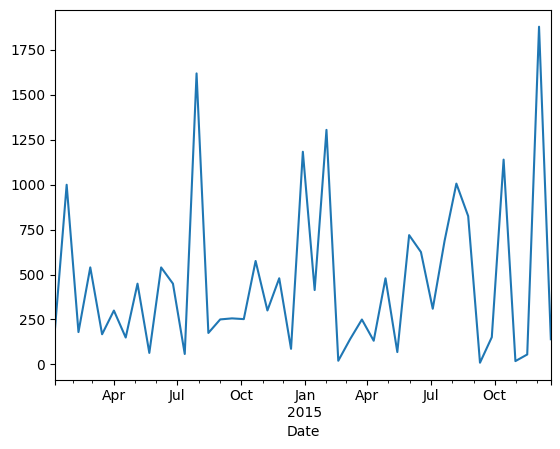

In [21]:
df.groupby('Date')['Revennue'].sum().plot()

In [22]:
df.groupby('Sales Agent')['Revennue'].sum().nlargest(5)

Sales Agent
Emeka       3109.44
Chioma      3102.30
Tolu        2812.19
Blessing    2363.04
Ibrahim     1749.87
Name: Revennue, dtype: float64

In [31]:
pivot = pd.pivot_table(df, values='Revennue', index="Products", columns="Year", aggfunc="sum")
pivot

Year,2014,2015
Products,,
Apple,250.00,1450.00
Compaq,1414.94,630.28
Dell,1918.14,2251.73
HP,3766.92,5810.73
Lenovo,1908.34,226.80


In [24]:
df.columns

Index(['Date', 'Branch', 'Sales Agent', 'Products', 'Units', 'Price', 'Year',
       'Month_Name', 'Revennue'],
      dtype='object')

In [ ]:
# customer analysis
print("Top 5 Sales Agent")
df.groupby('Sales Agent')['Revennue'].sum().nlargest(5)

Top 5 Sales Agent


Sales Agent
Emeka       3109.44
Chioma      3102.30
Tolu        2812.19
Blessing    2363.04
Ibrahim     1749.87
Name: Revennue, dtype: float64

In [37]:
top_agent = pd.pivot_table(df, values='Revennue', index='Sales Agent', columns='Year', aggfunc='sum')
print("Agent Sales per Year")
top_agent

Agent Sales per Year


Year,2014,2015
Sales Agent,,
Blessing,2033.70,329.34
Chinedu,336.43,1305.00
Chioma,3102.30,NaN
Emeka,1478.54,1630.90
George,700.82,686.95
Ibrahim,539.73,1210.14
Tolu,628.74,2183.45
Tonye,149.25,289.12
Torbari,57.71,479.04


In [43]:
# monthly / year sales
pd.pivot_table(df, values='Revennue', index='Sales Agent', columns='Year', aggfunc='sum')

Year,2014,2015
Sales Agent,,
Blessing,2033.70,329.34
Chinedu,336.43,1305.00
Chioma,3102.30,NaN
Emeka,1478.54,1630.90
George,700.82,686.95
Ibrahim,539.73,1210.14
Tolu,628.74,2183.45
Tonye,149.25,289.12
Torbari,57.71,479.04


<Axes: xlabel='Date'>

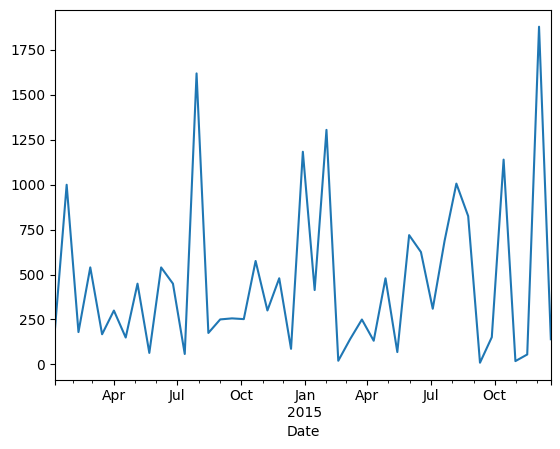

In [45]:
df.groupby('Date')['Revennue'].sum().plot()

<Axes: title={'center': 'Product Analysis'}, xlabel='Products'>

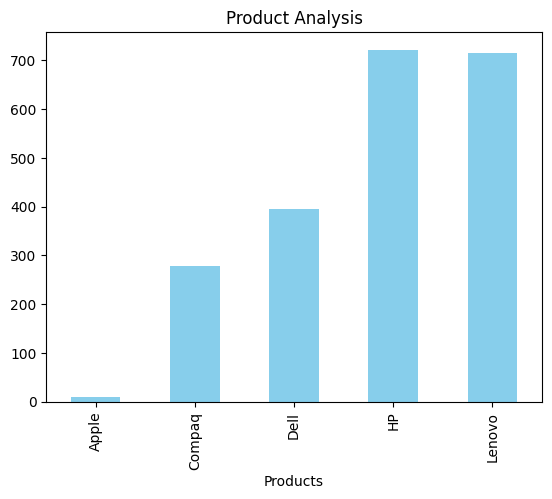

In [51]:
# Product Analysis
df.groupby('Products')['Units'].sum().plot(kind='bar', color='skyblue', title="Product Analysis")

<Axes: title={'center': 'Product Revenue Analysis'}, xlabel='Products'>

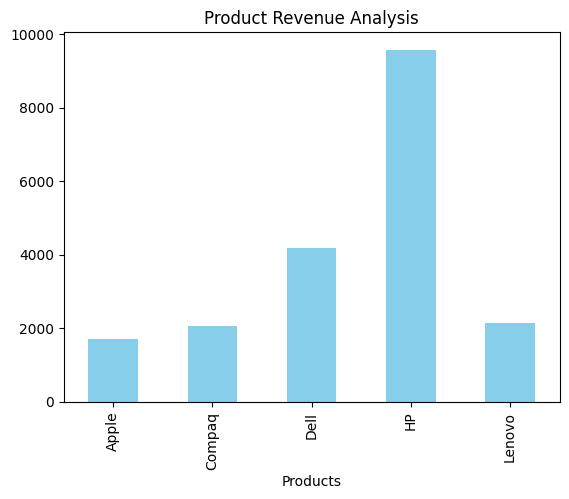

In [52]:
# Most Proftable Products
df.groupby('Products')['Revennue'].sum().plot(kind='bar', color='skyblue', title="Product Revenue Analysis")

In [60]:
# Branch Analysis
branch_summary = df.groupby('Branch')[['Revennue', 'Units', 'Products']].sum()
branch_summary

,Revennue,Units,Products
Branch,,,
GRA,6002.09,691,HPCompaqDellHPLenovoHPHPDellCompaqDellHPLenovo...
Town,2486.72,231,AppleHPLenovoLenovoHPCompaq
Woji,11139.07,1199,AppleAppleLenovoHPLenovoCompaqHPHPLenovoDellHP...


In [62]:
df.to_csv("Electronic_sales.csv", index=False)